# Decision tree classifier: diabetes prediction

Absolutely minimal MVP (minimum viable product) solution. Use this as a starting point to fill in the meat of the project according to the outline in '[How to complete data science projects for submission](https://github.com/4GeeksAcademy/gperdrizet-ds7-materials/blob/main/how_to/complete_data-science_projects.md)'.

## 1. Data loading

### 1.1. Load

In [24]:
# Handle imports up-front
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import uniform, norm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Load the data from the URL
df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

### 1.2. Inspect

- look at names of categories
- look for how many null values
- 

In [ ]:
# Your code here....
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


I see there are no null values in the dataset

### 1.3. Train-test split

For training a supervised model, there needs to be a split between one that has the outcome variable (in this case diabetes), and one that does not so we can train it I believe

In [35]:
# Separate features from labels
labels=df['Outcome']
features=df.drop('Outcome', axis=1)

# Split the data into training and testing features and labels
X_train, X_test, y_train, y_test=train_test_split(
    features,
    labels,
    test_size=0.2,
    random_state=315
)

### 1.4. Encoding

In [37]:
X_train.info()

X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 765 to 611
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 43.2 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
765,5,121,72,23,112,26.2,0.245,30
74,1,79,75,30,0,32.0,0.396,22
733,2,106,56,27,165,29.0,0.426,22
740,11,120,80,37,150,42.3,0.785,48
0,6,148,72,35,0,33.6,0.627,50


## 2. EDA

### 2.1. Baseline model performance

In [38]:
# Define a reusable helper function for cross-validation here. We are going to
# be doing a lot of cross-validation, this allows us to reuse this code
# without having to copy-paste it over and over.

def cross_val(model, features: pd.DataFrame, labels: pd.Series) -> list[float]:
    '''Reusable helper function to run cross-validation on a model. Takes model,
    Pandas data frame of features and Pandas data series of labels. Returns 
    list of cross-validation fold accuracy scores as percents.'''

    # Define the cross-validation strategy
    cross_validation=StratifiedKFold(n_splits=7, shuffle=True, random_state=315)

    # Run the cross-validation, collecting the scores
    scores=cross_val_score(
        model,
        features,
        labels,
        cv=cross_validation,
        n_jobs=-1,
        scoring='accuracy'
    )

    # Print mean and standard deviation of the scores
    print(f'Cross-validation accuracy: {(scores.mean() * 100):.2f} +/- {(scores.std() * 100):.2f}%')

    # Return the scores
    return scores

In [39]:
# Instantiate a random forest classifier model
model=DecisionTreeClassifier(random_state=315)
fit_result = model.fit(X_train, y_train)

# Run the cross-validation
scores=cross_val(model, X_train, y_train)

Cross-validation accuracy: 68.42 +/- 7.23%


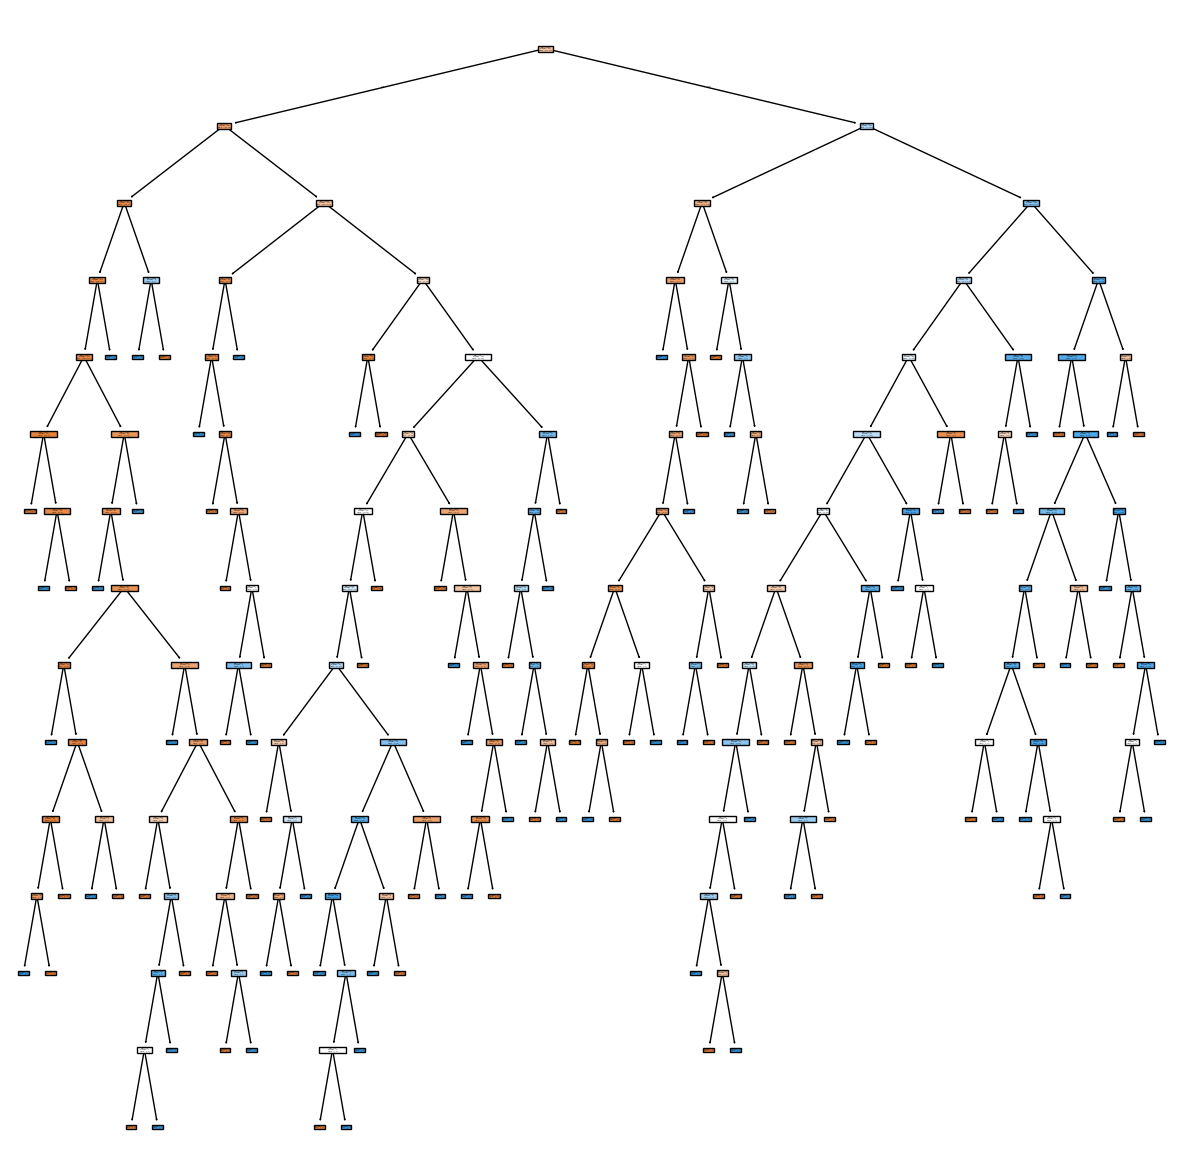

In [40]:
# Visualizing the tree

fig = plt.figure(figsize = (15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), filled = True)

plt.show()

### 2.2. Missing and/or extreme values

In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no missing values in the dataset.

### 2.3. Feature selection

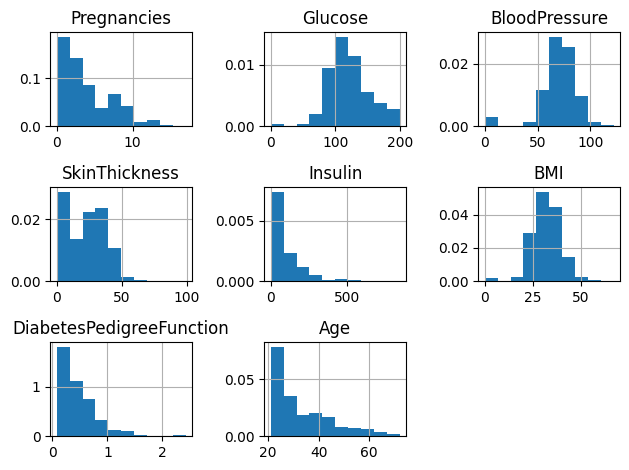

In [41]:
X_train.hist(density=True, layout=(3,3))
plt.tight_layout()
plt.show()

## 3. Model training

In [42]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1])

In [51]:
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"The model is {accuracy:.1f}% accurate")

The model is 74.7% accurate


## 4. Model optimization

### 4.1. Hyperparameter optimization

In [13]:
# from scipy.stats import uniform
# from sklearn.model_selection import RandomizedSearchCV

# Instantiate the model
model=DecisionTreeClassifier(random_state=315)

# Define the cross-validation strategy
cross_validation=StratifiedKFold(n_splits=7, shuffle=True, random_state=315)

# Define the hyperparameter search space
distributions={
    'max_depth': list(range(1, 50)),
    'min_samples_split': list(range(5, 50)),
    'min_samples_leaf': list(range(5, 50))
}

# Set-up the search
search=RandomizedSearchCV(
    model,
    distributions,
    scoring='accuracy',
    n_jobs=-1,
    cv=cross_validation,
    n_iter=50,
    random_state=315,
    return_train_score=True
)

results=search.fit(training_features, training_labels)
print(f'Best hyperparameters: {results.best_params_}')

Best hyperparameters: {'min_samples_split': 9, 'min_samples_leaf': 28, 'max_depth': 40}


### 4.2. Cross-validation of optimized model

In [ ]:
# Your code goes here...

### 4.3. Final model evaluation

In [ ]:
# Your code goes here...